Neuroscience Data Analysis with Python Workshop – MiniProject #1

Hila Yogev - 211624143

1. Import libraries & file setup 

In [2]:
# --- Libraries ---
# Import all useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# --- File Setup ---
#  A function for loading a CSV file and raise errors if needed
def load_data(file_path):
    try:
    # Read the CSV file directly into a DataFrame
        df = pd.read_csv(file_path)
        return df

    except FileNotFoundError:
    # Raise an exception if the path or file name is incorrect
        print(f"Path error: file not found in path - {file_path}")
        return None

    except Exception as e:
    # Raise an exception for any other issues (permissions, encoding, parsing, etc.)
        print("General file error: failed to load the CSV.")
        print(f"Details: {e}")
        return None


2. Main Program 

In [ ]:
# --- Main Program ---
path = "laptop_price - dataset.csv"
# Load the dataset
df = load_data(path)

# Stop here if loading failed
if df is None:
    raise SystemExit("Stopping execution because the dataset could not be loaded.")

# Quick sanity checks after loading
display(df)
print(f"Dataset shape: {df.shape}")
df.info() 


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.00
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.00
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.00


Dataset shape: (1275, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4

A. Plot the price of all the laptops - Histogram

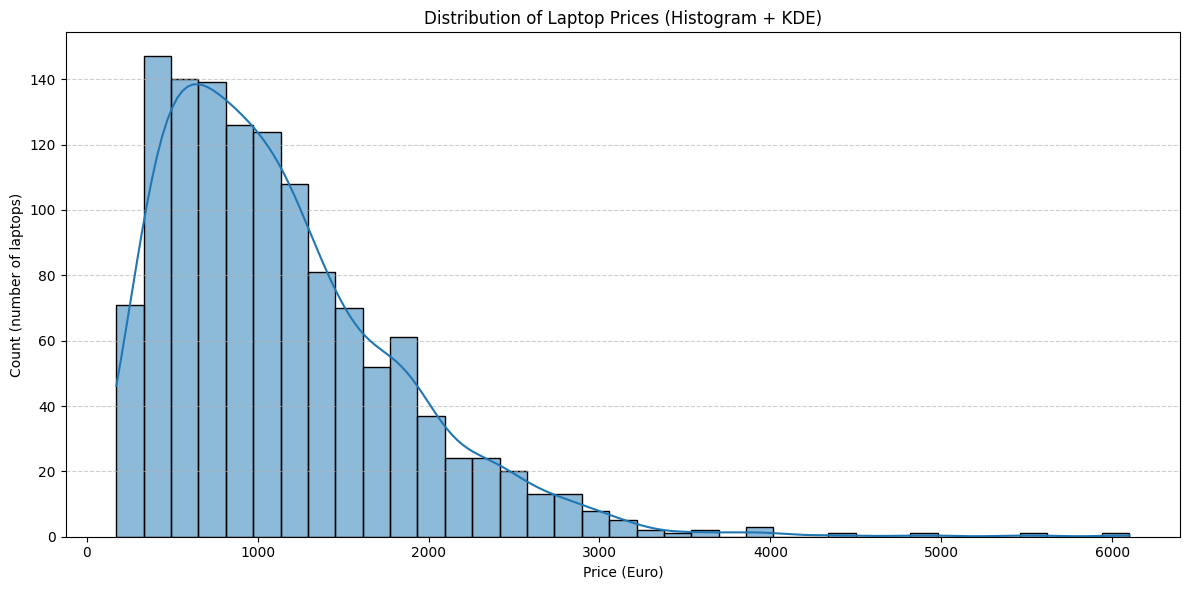

In [37]:
# --- Distribution of Laptop Prices (Histogram + KDE) using Seaborn ---
def all_prices(df):
    # Plot histogram + KDE (smooth trend line)
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x="Price (Euro)", bins="fd", kde=True)

    # Add required titles and axis labels (including units)
    plt.title("Distribution of Laptop Prices (Histogram + KDE)")
    plt.xlabel("Price (Euro)")
    plt.ylabel("Count (number of laptops)")

    # Add a readable horizontal grid for counts
    plt.grid(axis="y", linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.show()

# Call the function
all_prices(df)

B. Which company has on average the most expensive laptop? What is the average laptop price for each company?

In [38]:
def most_expensive_company(df):
    # Group by laptop manufacturer and compute the average price per company
    avg_per_company = df.groupby("Company")["Price (Euro)"].mean()

    # Sort from highest average price to lowest
    avg_per_company = avg_per_company.sort_values(ascending=False)

    return avg_per_company

In [42]:
# Use the previous function
avg_prices = most_expensive_company(df)

# Format the average price column for nicer display in the notebook
# avg_prices.style.format({"Avg Price (Euro)": "{:,.2f} €"})

# Print the company with the highest average price
print("Most expensive company on average:", avg_prices.index[0])
print("Average price:", avg_prices.iloc[0])

# Show the average price for each company (top 10 for readability)
display(avg_prices)


Most expensive company on average: Razer
Average price: 3346.1428571428573


Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64

In [ ]:
def avg_price_per_company_table(df):
    # Ensure the price column is numeric (non-numeric values become NaN)
    df["Price (Euro)"] = pd.to_numeric(df["Price (Euro)"], errors="coerce")

    # Compute average price per company and sort descending
    table = (
        df.groupby("Company")["Price (Euro)"]
        .mean()
        .sort_values(ascending=False)
        .reset_index()
        .rename(columns={"Price (Euro)": "Avg Price (Euro)"})
    )
    return table

avg_company_df = avg_price_per_company_table(df)

# Display the formatted table
display(avg_company_df.style.format({"Avg Price (Euro)": "{:,.2f} €"}))

# Print the company with the highest average price
top = avg_company_df.iloc[0]
print("Most expensive company on average:", top["Company"])
print("Average price:", f"{top['Avg Price (Euro)']:,.2f} €")